In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/fall22_hw/RoboChef/notebooks/recommendation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### EDA

In [3]:
raw_interactions = pd.read_csv("../../data/recommendation/RAW_interactions.csv")
raw_interactions.shape

(1132367, 5)

In [4]:
recipe_metadata = pd.read_csv("../../data/recommendation/RAW_recipes.csv")
recipe_metadata.shape

(231637, 12)

In [6]:
recipe_metadata.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
raw_interactions.nunique()

user_id       226570
recipe_id     231637
date            6396
rating             6
review       1125282
dtype: int64

In [11]:
recipe_metadata.nunique()

name              230185
id                231637
minutes              888
contributor_id     27926
submitted           5090
tags              209115
nutrition         229318
n_steps               94
steps             231074
description       222668
ingredients       230475
n_ingredients         41
dtype: int64

In [13]:
len(set(recipe_metadata.contributor_id)-set(raw_interactions.user_id))

10149

In [14]:
len(set(raw_interactions.user_id)-set(recipe_metadata.contributor_id))

208793

In [7]:
recipe_grp = raw_interactions.groupby("recipe_id").agg({"user_id":["count","nunique"],\
                                                   "rating":"mean"})
recipe_grp.head()

user_id            rating
            count nunique      mean
recipe_id                          
38              4       4  4.250000
39              1       1  3.000000
40              9       9  4.333333
41              2       2  4.500000
43              1       1  1.000000

In [24]:
sum(recipe_grp[("user_id","count")] != recipe_grp[("user_id","nunique")])

0

### How many users rate the same recipes ?

In [16]:
recipe_grp[[("user_id","count")]].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,user_id
,count
0.1,1.0
0.2,1.0
0.3,1.0
0.4,2.0
0.5,2.0
0.6,3.0
0.7,3.0
0.8,5.0
0.9,9.0


### Distribution of average rating for a recipe

array([[<AxesSubplot: title={'center': "('rating', 'mean')"}>]],
      dtype=object)

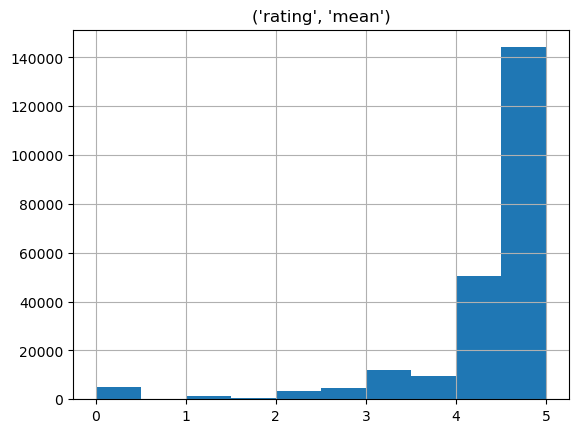

In [25]:
recipe_grp[[("rating","mean")]].hist()

### Join Metadata with Interactions

In [28]:
joined_df = raw_interactions.merge(recipe_metadata,left_on="recipe_id",right_on="id")
joined_df.nunique()

user_id            226570
recipe_id          231637
date                 6396
rating                  6
review            1125282
name               230185
id                 231637
minutes               888
contributor_id      27926
submitted            5090
tags               209115
nutrition          229318
n_steps                94
steps              231074
description        222668
ingredients        230475
n_ingredients          41
dtype: int64

In [29]:
joined_df[["minutes","n_steps","rating","n_ingredients"]].corr()

,minutes,n_steps,rating,n_ingredients
minutes,1.000000,-0.000438,0.001053,-0.001059
n_steps,-0.000438,1.000000,-0.021169,0.380295
rating,0.001053,-0.021169,1.000000,-0.003529
n_ingredients,-0.001059,0.380295,-0.003529,1.000000


In [32]:
joined_df[["minutes","n_steps","n_ingredients"]].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,minutes,n_steps,n_ingredients
0.1,1.000000e+01,4.0,5.0
0.2,2.000000e+01,5.0,6.0
0.3,2.500000e+01,6.0,7.0
0.4,3.000000e+01,7.0,8.0
0.5,4.000000e+01,8.0,9.0
0.6,5.000000e+01,10.0,10.0
0.7,6.000000e+01,11.0,11.0
0.8,7.500000e+01,13.0,12.0
0.9,1.500000e+02,17.0,14.0
1.0,2.147484e+09,145.0,43.0


In [61]:
joined_df[["minutes"]].quantile([0.91,0.93,0.95,0.99,0.995])/60

,minutes
0.910,2.916667
0.930,3.500000
0.950,5.166667
0.990,15.500000
0.995,24.500000


In [63]:
#clean minutes column: cap it
joined_df["minutes1"] = np.where(joined_df["minutes"]<=48*60,joined_df["minutes"],48*60) 

### Tukey Test on buckets of minutes and rating

In [64]:
joined_df["minutes_buckets"] = np.where(joined_df["minutes1"]<=15,"a.<=15",\
                                       np.where(joined_df["minutes1"]<=30,"b.<=30",\
                                               np.where(joined_df["minutes1"]<=60,"c.<=60",\
                                                        np.where(joined_df["minutes1"]<=60*4,"d.<=240","e.>240"))))

joined_df.pivot_table(index = ["minutes_buckets"], values = ["rating","n_steps","n_ingredients"])

,n_ingredients,n_steps,rating
minutes_buckets,,,
a.<=15,6.503086,5.737489,4.469096
b.<=30,8.597985,8.877021,4.427940
c.<=60,9.607273,10.610071,4.405543
d.<=240,10.337944,12.156324,4.383287
e.>240,9.147623,9.792240,4.310574


<AxesSubplot: xlabel='minutes_buckets'>

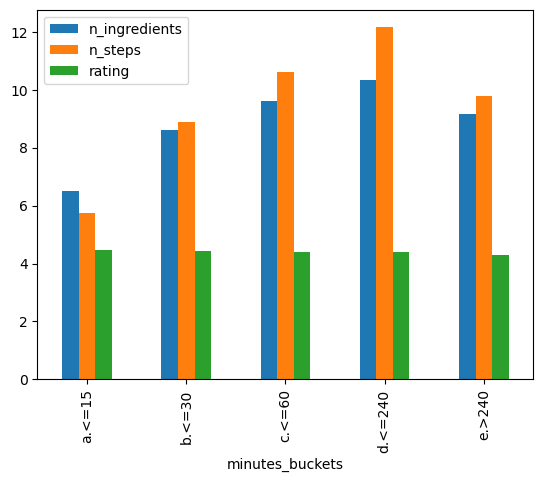

In [82]:
joined_df.pivot_table(index = ["minutes_buckets"], values = ["rating","n_steps","n_ingredients"]).plot(kind="bar")

**There is a slight trend vsisble**

In [65]:
joined_df.groupby("minutes_buckets").agg({"minutes1":["count","min","max"],\
                                        "rating":"mean"})

minutes1               rating
                   count  min   max      mean
minutes_buckets                              
a.<=15            199942    0    15  4.469096
b.<=30            266965   16    30  4.427940
c.<=60            343488   31    60  4.405543
d.<=240           248772   61   240  4.383287
e.>240             73200  241  2880  4.310574

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [75]:
def ad_tukey(grp="",reponse=""): 
    tukey = pairwise_tukeyhsd(endog=joined_df[response],
                          groups=joined_df[grp],alpha=0.01)
    print (tukey)

In [76]:
# perform Tukey's test
grp = "minutes_buckets"
for response in ["rating","n_ingredients", "n_steps"]:
    print (f"Group Variable: {grp}, Response Variable: {response}")
    ad_tukey(grp,response)
    print()

Group Variable: minutes_buckets, Response Variable: rating
 Multiple Comparison of Means - Tukey HSD, FWER=0.01 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
 a.<=15  b.<=30  -0.0412   0.0 -0.0533  -0.029   True
 a.<=15  c.<=60  -0.0636   0.0 -0.0751  -0.052   True
 a.<=15 d.<=240  -0.0858   0.0 -0.0982 -0.0735   True
 a.<=15  e.>240  -0.1585   0.0 -0.1763 -0.1407   True
 b.<=30  c.<=60  -0.0224   0.0  -0.033 -0.0118   True
 b.<=30 d.<=240  -0.0447   0.0 -0.0561 -0.0332   True
 b.<=30  e.>240  -0.1174   0.0 -0.1345 -0.1002   True
 c.<=60 d.<=240  -0.0223   0.0 -0.0331 -0.0114   True
 c.<=60  e.>240   -0.095   0.0 -0.1117 -0.0782   True
d.<=240  e.>240  -0.0727   0.0   -0.09 -0.0554   True
-----------------------------------------------------

Group Variable: minutes_buckets, Response Variable: n_ingredients
 Multiple Comparison of Means - Tukey HSD, FWER=0.01 
 group1  group2 meandiff p-adj  lower   upper  reject
----------

### Tukey Test on buckets of n_steps and rating

In [84]:
joined_df["steps_buckets"] = np.where(joined_df["n_steps"]<=5,"a.<=5",\
                                       np.where(joined_df["n_steps"]<=10,"b.<=10",\
                                               np.where(joined_df["n_steps"]<=20,"c.<=20","d.>20")))

joined_df.pivot_table(index = ["steps_buckets"], values = ["rating","minutes1","n_ingredients"])

,minutes1,n_ingredients,rating
steps_buckets,,,
a.<=5,68.958416,7.050548,4.440574
b.<=10,81.529694,8.591180,4.409932
c.<=20,88.829776,10.463593,4.400412
d.>20,167.337884,12.026554,4.340913


<AxesSubplot: xlabel='steps_buckets'>

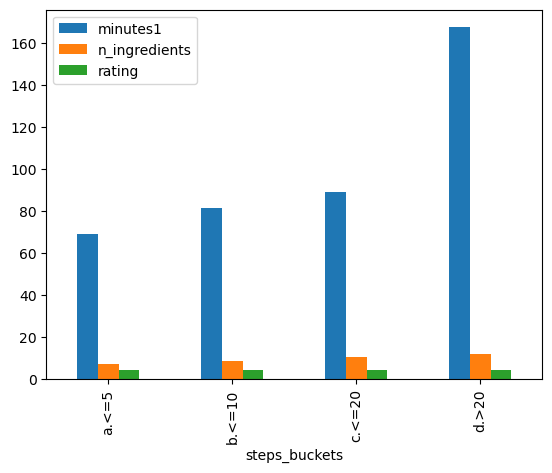

In [85]:
joined_df.pivot_table(index = ["steps_buckets"], values = ["rating","minutes1","n_ingredients"]).plot(kind="bar")

In [86]:
joined_df.groupby("steps_buckets").agg({"minutes1":["count","min","max"],\
                                        "rating":"mean","n_ingredients":"mean"})

minutes1              rating n_ingredients
                 count min   max      mean          mean
steps_buckets                                           
a.<=5           259811   0  2880  4.440574      7.050548
b.<=10          482992   0  2880  4.409932      8.591180
c.<=20          338724   0  2880  4.400412     10.463593
d.>20            50840   0  2880  4.340913     12.026554

In [87]:
# perform Tukey's test
grp = "steps_buckets"
for response in ["rating","n_ingredients", "minutes1"]:
    print (f"Group Variable: {grp}, Response Variable: {response}")
    ad_tukey(grp,response)
    print()

Group Variable: steps_buckets, Response Variable: rating
Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 a.<=5 b.<=10  -0.0306    0.0 -0.0402 -0.0211   True
 a.<=5 c.<=20  -0.0402    0.0 -0.0504 -0.0299   True
 a.<=5  d.>20  -0.0997    0.0 -0.1188 -0.0806   True
b.<=10 c.<=20  -0.0095 0.0043 -0.0183 -0.0007   True
b.<=10  d.>20   -0.069    0.0 -0.0874 -0.0507   True
c.<=20  d.>20  -0.0595    0.0 -0.0782 -0.0408   True
----------------------------------------------------

Group Variable: steps_buckets, Response Variable: n_ingredients
Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
 a.<=5 b.<=10   1.5406   0.0 1.5148 1.5665   True
 a.<=5 c.<=20    3.413   0.0 3.3854 3.4407   True
 a.<=5  d.>20    4.976   0.0 4.9245 5.0275   True
b.<=10 c.<=20   1.8724   0.0 1.8486 1.8962   T